In [71]:
# Packages

import math
import pandas as pd
import numpy as np
import re

from datetime import datetime
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import csv

In [18]:
# Parameters

train='C:/Users/m01i795/iPython Notebooks/Kaggle/Input/train.csv'
test='C:/Users/m01i795/iPython Notebooks/Kaggle/Input/test.csv'

In [19]:
with open(train, 'rb') as f:
    reader = csv.reader(f)
    coltxt = next(reader)   #gets the first line

In [34]:
# Now, reading in the first 1500 rows to keep memory use low
features_probe = pd.read_csv(train, nrows=1500, low_memory=False)

In [70]:
features_probe.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
ID,2,4,5,7,8,14,16,20,21,22,23,24,25,26,28
VAR_0001,H,H,H,H,R,R,H,R,R,R,R,H,H,R,Q
VAR_0002,224,7,116,240,72,4,60,13,17,24,61,140,258,43,36
VAR_0003,0,53,3,300,261,4,132,75,16,72,12,0,14,126,99
VAR_0004,4300,4448,3464,3200,2000,4422,40000,3600,2296,450,1186,1962,3500,4000,1500
VAR_0005,C,B,C,C,N,C,C,B,N,N,C,C,B,B,B
VAR_0006,0,1,0,0,0,0,1,0,1,0,1,0,6,0,0
VAR_0007,0,0,0,0,0,0,1,0,1,0,1,0,2,0,0
VAR_0008,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
VAR_0009,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
# Fastest way to get dtypes of dataframe:
features_probe.get_dtype_counts()

bool         13
float64     290
int64      1594
object       37
dtype: int64

In [58]:
features_probe['VAR_0008'].value_counts()

False    1500
dtype: int64

In [72]:
# OK, now reading in a small, but substantial, file, but this time I leave out the low_memory=False (I'm specifying the columns myself)
features_small = pd.read_csv(train, nrows=2500, dtype=features_probe.dtypes, na_values=[''])

In [73]:
features_small['VAR_0008'].value_counts(dropna=False)

false    2500
dtype: int64

In [74]:
features_small.get_dtype_counts()

object    1934
dtype: int64

In [75]:
# The above types are a pity in terms of output: I hoped to have casted the variables to the proper types :(

In [76]:
# Cleaning the ID and target columns respectively
labels_small=features_small['target']
features_small.drop(['ID', 'target'], axis=1, inplace=True)

In [77]:
for ii in features_small.columns:
    print "Checking: " + ii
    print "="*40
    print features_small[ii].value_counts()
    print
    print "First 10 values: "
    print "-+"*20
    for jj in range(10):
        print features_small[ii][jj]
    print

Checking: VAR_0001
R    1423
H    1071
Q       6
dtype: int64

First 10 values: 
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
H
H
H
H
R
R
H
R
R
R

Checking: VAR_0002
12     83
24     71
36     67
60     51
6      50
48     42
3      42
13     42
2      39
1      38
84     38
72     37
4      32
9      32
999    30
25     30
5      29
120    29
26     27
14     25
61     24
30     24
39     22
18     22
144    21
8      20
28     20
7      20
108    20
27     19
       ..
502     1
268     1
373     1
273     1
391     1
630     1
416     1
417     1
600     1
828     1
530     1
294     1
295     1
375     1
188     1
258     1
184     1
535     1
199     1
452     1
155     1
194     1
311     1
489     1
654     1
193     1
254     1
172     1
251     1
459     1
dtype: int64

First 10 values: 
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
224
7
116
240
72
4
60
13
17
24

Checking: VAR_0003
0      287
24      65
60      63
12      55
72      42
36      41
6       38
48      33
61      27
5    

In [78]:
def timetodaysago (timeobs):
    # input: timeobs is of format 23NOV10:00:00:00
    # output: days ago since September 1st, 2015
    
    try:
        d0= datetime.strptime(timeobs[:7], '%d%b%y')
        d1= datetime.strptime('01SEP15', '%d%b%y')
        delta = d1 - d0
        return delta.days
    except:
        return timeobs

# Test by removing # in line below
# timetodaysago('04AUG12:00:00:00') 

In [79]:
def areallvalues(series):
    try:
        series.fillna(-9999)
        series = series.astype('float64')
    except:
        return False        
    return True

In [80]:
# Processing the columns of the dataframe:

# Table above suggests that there are five situations for categorical columns:
# 1) Drop columns if only 1 value is there (useless)
# 2) Transform timestamps to a continuous variable
# 3) One-hot encoding for columns with 1 < cardinality < 60
# 4) Cardinality > 60 and values -> cast them to float64
# 5) Cardinality > 60 and 'names' >> TODO binning (for now, dummies for largest variables)

for ii in features_small.columns:
    raw_cardinality = len(features_small[ii].value_counts())
    
    print
    print 'Checking: ' + str(ii)
    print 'Raw Cardinality: ' + str(raw_cardinality)
    
    if raw_cardinality <= 1: # So there is max a single value in all columns (situation 1) --> drop!
        print 'Only one or zero distinct values --> drop'
        features_small.drop(ii, axis=1, inplace=True)
    else: # Checking whether we have situation 2 or 3/4/5 now...
        top_keys = pd.Series(list(features_small[ii].value_counts().keys()))
        top_values = pd.Series(list(features_small[ii].value_counts()))    
        to_check = top_keys[~pd.isnull(top_keys)][0]
        print top_keys
        
        print 'Checking for datetimeformat: ' + str(to_check) # Note that raw cardinality > 1, so there has to be a non-null value

        p = re.compile(r'\w{7}:\d{2}:\d{2}:\d{2}') # Regular expression for datetime format used
        # Situation 2:
        if p.match(str(to_check)): # Situation 2: the match returns something > it's of a datetime format 
            print 'Timestamp format --> mapping to timetodaysago'
            features_small[ii].fillna(-9999)
            features_small[ii]=features_small[ii].map(timetodaysago)
            features_small[ii] = features_small[ii].astype('float64')
            
        else: # Checking whether we have situation 3 or 4/5 now...           
            if raw_cardinality < 60: # This would be situation 3 --> Let's one hot encode this!
                print 'Making ' + str(raw_cardinality) + ' dummies'
                toadd = pd.get_dummies(features_small[ii], prefix=ii, sparse=True) # Generate dummies (for variables with n > 30)
                features_small = pd.concat([features_small, toadd], axis=1) # Add the dummies to the DataFrame
                features_small.drop(ii, axis=1, inplace=True) # Dropping the original column, as it has been one hot encoded now.
            
            else: # Checking whether we have situation 4 or 5 now...                
                features_small[ii].fillna(-9999)
                if areallvalues(features_small[ii]): # Situation 4 is easiest...
                    print 'Raw cardinality >60 detected, and types can be casted to float64. So doing that now...'
                    features_small[ii]=features_small[ii].astype('float64')
                else: # So, situation 5 with large cardinality and few observations (TODO: binning!!)
                    top_keys = top_keys[top_values>30] # So, observations with n>30 get a seperate dummy                   
                    cardinality_corrected=len(top_keys)
                    print 'Cardinality corrected for at least 30 observations: ' + str(cardinality_corrected)
                    if cardinality_corrected >= 1:
                        print 'Making ' + str(cardinality_corrected + 1) + ' dummies'
                        features_small[ii]=features_small[ii].map(lambda x: x if (x in list(top_keys)) else ('_other')) # And maps the values to this top (or var_other)
                        toadd = pd.get_dummies(features_small[ii], prefix=ii, sparse=True) # Generate dummies (for variables with n > 30)
                        features_small = pd.concat([features_small, toadd], axis=1) # Add the dummies to the DataFrame
                    features_small.drop(ii, axis=1, inplace=True) # Dropping the original column, as it has been one hot encoded now.



Checking: VAR_0001
Raw Cardinality: 3
0    R
1    H
2    Q
dtype: object
Checking for datetimeformat: R
Making 3 dummies

Checking: VAR_0002
Raw Cardinality: 369
0       12
1       24
2       36
3       60
4        6
5       48
6        3
7       13
8        2
9        1
10      84
11      72
12       4
13       9
14     999
15      25
16       5
17     120
18      26
19      14
20      61
21      30
22      39
23      18
24     144
25       8
26      28
27       7
28     108
29      27
      ... 
339    502
340    268
341    373
342    273
343    391
344    630
345    416
346    417
347    600
348    828
349    530
350    294
351    295
352    375
353    188
354    258
355    184
356    535
357    199
358    452
359    155
360    194
361    311
362    489
363    654
364    193
365    254
366    172
367    251
368    459
dtype: object
Checking for datetimeformat: 12
Raw cardinality >60 detected, and types can be casted to float64. So doing that now...

Checking: VAR_0003
Raw Cardinali

KeyboardInterrupt: 

In [46]:
features_small.shape

(15000, 19028)

In [51]:
features_small.get_dtype_counts()

float64    19028
dtype: int64

In [49]:
clf = RandomForestClassifier(n_estimators=10)

In [52]:
clf = clf.fit(features_small, labels_small)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [303]:
# Loading the full dataset now in an efficient way
# Need to change to skiprows=1 for final version, this is just to speed things up a bit
features_train = pd.read_csv(train, dtype=features_small.dtypes, names=coltxt, skiprows=100000)

In [9]:
labels_train = features_train['target']

In [20]:
# How to find a value easily in a Pandas series?

for col in features_train.columns:
    if len(features_train[features_train[col]=='IAPS'])>0:
        print "IAPS found in " + col

IAPS found in VAR_1934


In [11]:
features_small.select_dtypes(include=[object]).columns

Index([u'VAR_0001', u'VAR_0005', u'VAR_0044', u'VAR_0073', u'VAR_0075',
       u'VAR_0156', u'VAR_0157', u'VAR_0158', u'VAR_0159', u'VAR_0166',
       u'VAR_0167', u'VAR_0168', u'VAR_0169', u'VAR_0176', u'VAR_0177',
       u'VAR_0178', u'VAR_0179', u'VAR_0200', u'VAR_0202', u'VAR_0204',
       u'VAR_0216', u'VAR_0217', u'VAR_0222', u'VAR_0237', u'VAR_0274',
       u'VAR_0283', u'VAR_0305', u'VAR_0325', u'VAR_0342', u'VAR_0352',
       u'VAR_0353', u'VAR_0354', u'VAR_0404', u'VAR_0466', u'VAR_0467',
       u'VAR_0493', u'VAR_1934'],
      dtype='object')

In [52]:
for ii in cardinality.columns:
    print ii + ": " + str(len(features_train[ii].value_counts()))

VAR_0001: 3
VAR_0002: 715
VAR_0003: 527
VAR_0004: 5705
VAR_0005: 4
VAR_0006: 30
VAR_0007: 26
VAR_0008: 1
VAR_0009: 1
VAR_0010: 1
VAR_0011: 1
VAR_0012: 1
VAR_0013: 30
VAR_0014: 28
VAR_0015: 20
VAR_0016: 22
VAR_0017: 18
VAR_0018: 1
VAR_0019: 1
VAR_0020: 1
VAR_0021: 1
VAR_0022: 1
VAR_0023: 1
VAR_0024: 1
VAR_0025: 1
VAR_0026: 1
VAR_0027: 1
VAR_0028: 1
VAR_0029: 1
VAR_0030: 1
VAR_0031: 1
VAR_0032: 1
VAR_0033: 14
VAR_0034: 23
VAR_0035: 24
VAR_0036: 18
VAR_0037: 13
VAR_0038: 1
VAR_0039: 1
VAR_0040: 1
VAR_0041: 1
VAR_0042: 1
VAR_0043: 1
VAR_0044: 1
VAR_0045: 4
VAR_0046: 5
VAR_0047: 7
VAR_0048: 11
VAR_0049: 20
VAR_0050: 26
VAR_0051: 26
VAR_0052: 8
VAR_0053: 9
VAR_0054: 11
VAR_0055: 12
VAR_0056: 18
VAR_0057: 22
VAR_0058: 23
VAR_0059: 34
VAR_0060: 47
VAR_0061: 58
VAR_0062: 69
VAR_0063: 114
VAR_0064: 137
VAR_0065: 147
VAR_0066: 91
VAR_0067: 137
VAR_0068: 177
VAR_0069: 203
VAR_0070: 307
VAR_0071: 386
VAR_0072: 428
VAR_0073: 1279
VAR_0074: 2624
VAR_0075: 2051
VAR_0076: 93
VAR_0077: 139
VAR_0078: 183

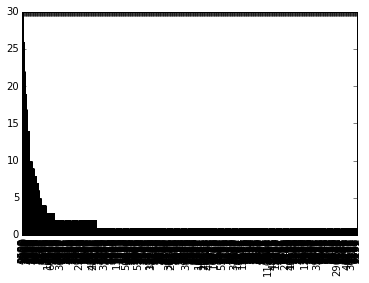

In [320]:
%matplotlib inline
features_small['VAR_0004'].value_counts().plot(kind='bar')

In [34]:
toadd = pd.get_dummies(features_train['VAR_0001'], sparse=False)

In [36]:
features_train = pd.concat([features_train, toadd], axis=1)

In [37]:
features_train.head(5)

,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,VAR_0010,...,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,H,Q,R
0,H,362,62,1347,C,0,0,false,false,false,...,997,999999997,400,997,9996,53,BRANCH,1,0,0
1,R,0,25,2165,B,0,0,false,false,false,...,998,999999998,998,998,9998,9998,BRANCH,0,0,1
2,R,91,0,0,B,0,0,false,false,false,...,998,999999998,998,998,9998,9998,BRANCH,0,0,1
3,R,170,36,3346,C,0,0,false,false,false,...,998,999999998,998,998,9998,9998,IAPS,0,0,1
4,R,77,90,2170,C,0,0,false,false,false,...,998,999999998,998,998,9998,9998,BRANCH,0,0,1


In [12]:
clf = tree.DecisionTreeClassifier()

In [13]:
clf = clf.fit(features_train, labels_train)

ValueError: could not convert string to float: IAPS

In [16]:
# clf = linear_model.SGDClassifier()

In [17]:
# clf.fit(features_train, labels_train)

ValueError: could not convert string to float: IAPS

In [47]:
pd.read_csv?

In [118]:
# Alternative, somewhat longer :
features_probe.dtypes.value_counts()

int64      1594
float64     290
object       37
bool         13
dtype: int64

In [119]:
# Alternative, even longer :)
# filter(lambda s: s == np.dtype('O'), features_small.dtypes.values)

{d: sum(1 for _ in filter(lambda s: s == d, features_probe.dtypes.values)) for d in np.unique(features_probe.dtypes.values)}

{dtype('bool'): 13,
 dtype('int64'): 1594,
 dtype('float64'): 290,
 dtype('O'): 37}

In [123]:
col_types = features_small.columns
categorical_cols = [ii for ii in features_small.select_dtypes(include=[object]).columns]
bool_cols = [ii for ii in features_small.select_dtypes(include=[bool]).columns]            
value_cols = [ii for ii in features_small.select_dtypes(include=['int64', 'float64']).columns]

In [23]:
row = {'var1': 200, 'var2': 'a', 'var3': True}

x = []
for key in row:
    print key
    value = row[key]
    # one-hot encode everything with hash trick
    index = abs(hash(key + '_' + value)) % D
    x.append(index)

print x

var1


TypeError: cannot concatenate 'str' and 'int' objects

In [127]:
# Processing the columns of the dataframe:

# Table above suggests that there are three situations for categorical columns:
# 1) Drop columns if only 1 value is there (useless)
# 2) Transform timestamps to a continuous variable
# 3) One-hot encoding for columns with 1 < cardinality < 60
# 4) Cast the column to float64 if cardinality > 60

for ii in features_small.columns
    raw_cardinality = len(features_small[ii].value_counts())
    print
    print 'Checking: ' + str(ii)
    print 'Raw Cardinality: ' + str(raw_cardinality)
    
    if raw_cardinality <= 1: # So there is max a single value in all columns (situation 1) --> drop!
        print 'Only one or zero distinct values --> drop'
        features_small.drop(ii, axis=1, inplace=True)
    else: # Checking whether we have situation 2 or 3/4 now...
        top_keys = pd.Series(list(features_small[ii].value_counts().keys()))
        top_values = pd.Series(list(features_small[ii].value_counts()))    

        to_check = top_keys[~pd.isnull(top_keys)][0]        
        print 'Checking for datetimeformat: ' + str(to_check) # Note that raw cardinality > 1, so there has to be a non-null value

        p = re.compile(r'\w{7}:\d{2}:\d{2}:\d{2}') # Regular expression for datetime format used
        # Situation 2:
        if p.match(str(to_check)): # Situation 2: the match returns something > it's of a datetime format 
            print 'Timestamp format --> mapping to timetodaysago'
            features_small[ii]=features_small[ii].map(timetodaysago)
            features_small[ii].fillna(-9999)
            features_small[ii] = features_small[ii].astype('float64')
            
        else:            
            
            
            top_keys = top_keys[top_values>30] # So, keep only observations with n>30
            cardinality_corrected=len(top_keys)
            print 'Cardinality corrected: ' + str(cardinality_corrected)
            print top_keys
            
            if cardinality_corrected > 1: # So, this means less than 50 unique values > making dummies
            
                if cardinality_corrected < raw_cardinality: # if they are equal, don't add 'other' column, just make dummies
                    print 'Making ' + str(cardinality_corrected + 1) + ' dummies'
                    features_small[ii]=features_small[ii].map(lambda x: x if (x in list(top_keys)) else ('_other')) # And maps the values to this top (or var_other)
                else:
                    print 'Making ' + str(cardinality_corrected) + ' dummies (no additional _other needed)'
                toadd = pd.get_dummies(features_small[ii], prefix=ii, sparse=False) # Generate dummies (for variables with n > 30)
                features_small = pd.concat([features_small, toadd], axis=1) # Add the dummies to the DataFrame
                features_small.drop(ii, axis=1, inplace=True) # Dropping the original column, as it has been one hot encoded now.
            else:
                print 'Treating this column as boolean: 1 < raw cardinality < 50 and corrected cardinality <= 1'
                top_keys = pd.Series(list(features_small[ii].value_counts().keys()))
                top_keys = list(top_keys[~pd.isnull(top_keys)])
                print 'List of values as 1: ' + str(top_keys)
                features_small[ii]=features_small[ii].map(lambda x: np.nan if (pd.isnull(x)) else 1 if (x in top_keys) else 0)


Checking: VAR_0001
Raw Cardinality: 3
Checking for datetimeformat: R
Cardinality corrected: 3
0    R
1    H
2    Q
dtype: object
Making 3 dummies (no additional _other needed)

Checking: VAR_0002
Raw Cardinality: 670
Checking for datetimeformat: 12
Cardinality corrected: 176
0       12
1       24
2       36
3       60
4       13
5        6
6       48
7        3
8       72
9        2
10       1
11      84
12       4
13       7
14       5
15     120
16      25
17      26
18      18
19      14
20     999
21       9
22       8
23      96
24     144
25      30
26      15
27      38
28      27
29      42
      ... 
146    127
147     95
148    133
149     58
150    142
151    113
152    131
153    140
154     94
155    186
156    157
157    116
158    135
159    252
160    139
161    103
162    115
163    169
164    107
165    128
166    480
167    158
168    174
169    154
170    183
171    336
172    181
173    161
174    118
175    137
dtype: object
Making 177 dummies

Checking: VAR_0003

KeyboardInterrupt: 

In [76]:
# Processing the columns with bool values
# None left :(
for ii in bool_cols:
    top_values = pd.Series(list(features_small[ii].value_counts())) 
    top_keys = pd.Series(list(features_small[ii].value_counts().keys()))
    raw_cardinality = len(top_values)
    
    top_keys = top_keys[top_values>30] # So, keep only observations with n>30
    raw_cardinality = len(features_small[ii].value_counts())
    print
    print 'Checking: ' + str(ii)
    print 'Raw Cardinality: ' + str(raw_cardinality)
    
    if raw_cardinality <= 1: # So there is max a single value in all columns (situation 1) --> drop!
        print 'Only one or zero distinct value --> drop'
        features_small.drop(ii, axis=1, inplace=True)
    else:
        print 'Proper column, so replacing True with 1, False with 0 and keeping nan'
        features_small[ii]=features_small[ii].map(lambda x: np.nan if (pd.isnull(x)) else 1 if (x) else 0)


Checking: VAR_0008
Raw Cardinality: 1
Only one or zero distinct value --> drop

Checking: VAR_0009
Raw Cardinality: 1
Only one or zero distinct value --> drop

Checking: VAR_0010
Raw Cardinality: 1
Only one or zero distinct value --> drop

Checking: VAR_0011
Raw Cardinality: 1
Only one or zero distinct value --> drop

Checking: VAR_0012
Raw Cardinality: 1
Only one or zero distinct value --> drop

Checking: VAR_0043
Raw Cardinality: 1
Only one or zero distinct value --> drop

Checking: VAR_0196
Raw Cardinality: 1
Only one or zero distinct value --> drop

Checking: VAR_0226
Raw Cardinality: 2
Proper column, so replacing True with 1, False with 0 and keeping nan

Checking: VAR_0229
Raw Cardinality: 1
Only one or zero distinct value --> drop

Checking: VAR_0230
Raw Cardinality: 2
Proper column, so replacing True with 1, False with 0 and keeping nan

Checking: VAR_0232
Raw Cardinality: 2
Proper column, so replacing True with 1, False with 0 and keeping nan

Checking: VAR_0236
Raw Cardinali

In [77]:
# Processing the columns with integer or float values
# None left :(
for ii in value_cols:
    raw_cardinality = len(features_small[ii].value_counts())
    print
    print 'Checking: ' + str(ii)
    print 'Raw Cardinality: ' + str(raw_cardinality)
    
    if raw_cardinality <= 1: # So there is max a single value in all columns (situation 1) --> drop!
        print 'Only one or zero distinct value --> drop'
        features_small.drop(ii, axis=1, inplace=True)
        
    elif raw_cardinality < 50: # This means that it's more categorical than a true number
        print 'Making ' + str(raw_cardinality) + ' dummies (no additional _other needed)'
        toadd = pd.get_dummies(features_small[ii], prefix=ii, sparse=False) # Generate dummies (for variables with n > 30)
        features_small = pd.concat([features_small, toadd], axis=1) # Add the dummies to the DataFrame
        features_small.drop(ii, axis=1, inplace=True) # Dropping the original column, as it has been one hot encoded now.
    else:
        print 'Keeping this column as it is currently'



Checking: VAR_0002
Raw Cardinality: 313
Keeping this column as it is currently

Checking: VAR_0003
Raw Cardinality: 289
Keeping this column as it is currently

Checking: VAR_0004
Raw Cardinality: 814
Keeping this column as it is currently

Checking: VAR_0006
Raw Cardinality: 17
Making 17 dummies (no additional _other needed)

Checking: VAR_0007
Raw Cardinality: 12
Making 12 dummies (no additional _other needed)

Checking: VAR_0013
Raw Cardinality: 17
Making 17 dummies (no additional _other needed)

Checking: VAR_0014
Raw Cardinality: 12
Making 12 dummies (no additional _other needed)

Checking: VAR_0015
Raw Cardinality: 10
Making 10 dummies (no additional _other needed)

Checking: VAR_0016
Raw Cardinality: 12
Making 12 dummies (no additional _other needed)

Checking: VAR_0017
Raw Cardinality: 11
Making 11 dummies (no additional _other needed)

Checking: VAR_0018
Raw Cardinality: 1
Only one or zero distinct value --> drop

Checking: VAR_0019
Raw Cardinality: 1
Only one or zero distinct